# Car Price Prediction using Linear Regression

#### Five step process:

1. Understanding and Visualizing the data
2. Preparing data for modelling
3. Training the model
4.  Residual Analysis
5. Prediction and Analysis

#### Importing necessary libraries

In [2]:
#Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler , LabelEncoder

from sklearn.metrics import r2_score

## 1. Understanding and Visualizing the data

In [4]:
#Importing the data
cars = pd.read_csv(r'D:\ML\CarPrice_Assignment.csv')
backup_cars = cars.copy()
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#Viewing the columns
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
#Viewing the shape of dataframe
cars.shape

(205, 26)

In [7]:
#Checking for null values
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
#There are no null values. In the problem statement it is advised to retain only the first name of the car.
#Viewing car names
cars.CarName.head()

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
Name: CarName, dtype: object

In [9]:
#Converting carnames
cars.CarName = cars.CarName.apply(lambda x: x.split()[0])

We could notice there is spelling mistakes in the data, it could affect our analysis, so it should be treated

In [10]:
cars.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [11]:
#Treating spelling errors

#maxda to mazda
cars.CarName[cars.CarName  == 'maxda'] = 'mazda'

#Nissan to nissan
cars.CarName[cars.CarName  == 'Nissan'] = 'nissan'

#porcshce to porsche
cars.CarName[cars.CarName  == 'porcshce'] = 'porsche'

#toyouta to toyota
cars.CarName[cars.CarName  == 'toyouta'] = 'toyota'

#vokswagen and vs to volkswagen
cars.CarName[(cars.CarName  == 'vokswagen') | (cars.CarName  == 'vw')] = 'volkswagen'

In [12]:
#renaming Carname to Carbrand
cars.rename(columns = {"CarName" : "CarBrand"} , inplace = True)

#viewing the changes
cars.CarBrand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [13]:
#Car_id is insignificant for the analysis. Hence dropping

cars.drop('car_ID' , axis = 1 , inplace = True)

In [14]:
cars.head()

,symboling,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
#vieiwing the numerical variables
cars.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [16]:
#Differenciating categorical variables and numerical variables
cars.columns

numvars = ['symboling','wheelbase', 'carlength','carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 
           'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

catvars = [ 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation','cylindernumber',
       'enginetype', 'fuelsystem', ]

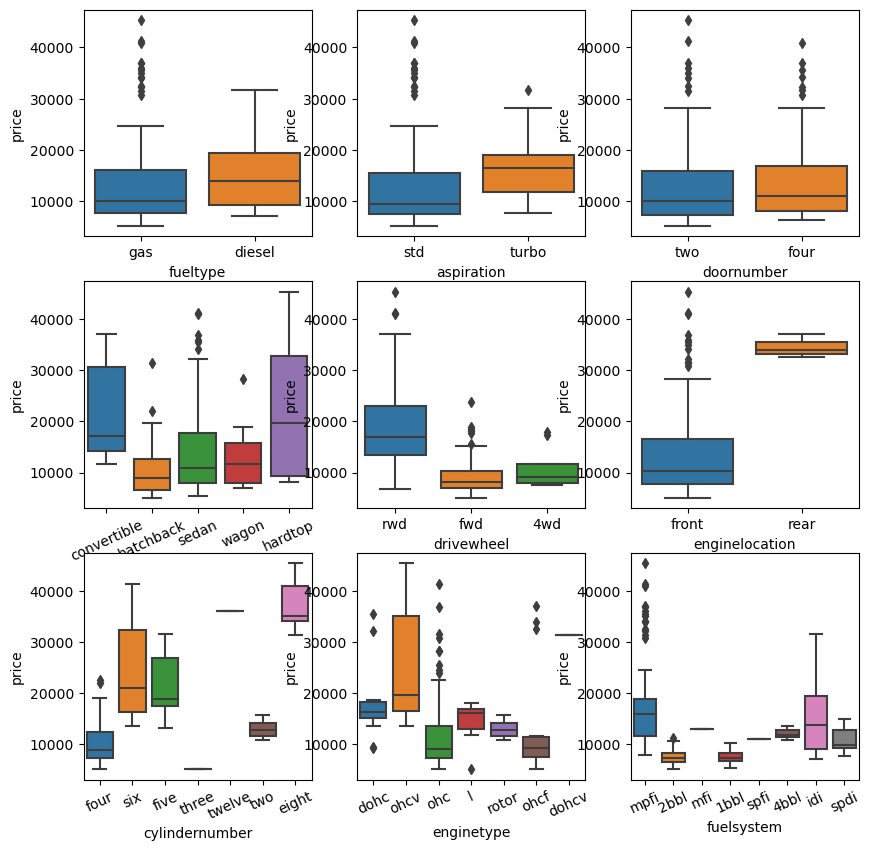

In [17]:
#Visualizing categorical variables except carname
fig , axes = plt.subplots(3 , 3 , figsize = [10 , 10])

sns.boxplot(ax = axes[0,0] , data = cars , x = cars.fueltype , y = cars.price)
sns.boxplot(ax = axes[0,1] , data = cars , x = cars.aspiration , y = cars.price)
sns.boxplot(ax = axes[0,2] , data = cars , x = cars.doornumber , y = cars.price)
sns.boxplot(ax = axes[1,0] , data = cars , x = cars.carbody , y = cars.price)
axes[1,0].tick_params(axis = 'x', labelrotation = 25)

sns.boxplot(ax = axes[1,1] , data = cars , x = cars.drivewheel , y = cars.price)
sns.boxplot(ax = axes[1,2] , data = cars , x = cars.enginelocation , y = cars.price)
sns.boxplot(ax = axes[2,0] , data = cars , x = cars.cylindernumber , y = cars.price)
axes[2,0].tick_params(axis = 'x', labelrotation = 25)
sns.boxplot(ax = axes[2,1] , data = cars , x = cars.enginetype , y = cars.price)
axes[2,1].tick_params(axis = 'x', labelrotation = 25)
sns.boxplot(ax = axes[2,2] , data = cars , x = cars.fuelsystem , y = cars.price)
axes[2,2].tick_params(axis = 'x', labelrotation = 25)

## 2.Preparing data for modelling

#### Converting binary variables to 1s and 0s

Binary variables -
1. enginelocation 
2. doornumber 
3. aspiration 
4. fueltype

In [18]:
#Binary conversion - 1. enginelocation
cars.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [19]:
def alter(x):
    if x == 'front':
        x = 1
    else:
        x = 0
    return x

cars.enginelocation = cars.enginelocation.apply(lambda x : alter(x))

In [20]:
#Binary conversion - 2. doornumber
cars.doornumber.unique()

array(['two', 'four'], dtype=object)

In [21]:
def alter(x):
    if x == 'two':
        x = 1
    else:
        x = 0
    return x

cars.doornumber = cars.doornumber.apply(lambda x : alter(x))

In [22]:
#Binary conversion - 3. aspiration
cars.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [23]:
def alter(x):
    if x == 'turbo':
        x = 1
    else:
        x = 0
    return x

cars.aspiration = cars.aspiration.apply(lambda x : alter(x))

In [24]:
#Binary conversion - 4. fueltype
cars.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [25]:
def alter(x):
    if x == 'gas':
        x = 1
    else:
        x = 0
    return x

cars.fueltype = cars.fueltype.apply(lambda x : alter(x))

Label encoding using the manual method - cylindernumber

In [26]:
#Label encoding - manual - cylindernumber
#viewing the unique values
cars.cylindernumber.value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [27]:
#creating a numbers dictionary with the unique values and modifying them in the data frame
numbers = {'four' : 4 , 'six':6 , 'five':5 , 'eight': 8 , 'two' : 2 , 'three' : 3 , 'twelve' : 12}
cars.cylindernumber = cars.cylindernumber.apply( lambda x : numbers.get(x))

In [28]:
#verifying if the label encoding is successful
cars.cylindernumber.value_counts()

cylindernumber
4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: count, dtype: int64

Label encoding using the label encoders

1. carbody
2. drivewheel
3. enginetype
4. fuelsystem
5. CarName

In [29]:
#Label encoding - 1. cylindernumber
label_encoders = {}
for column in cars.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    cars[column] = label_encoders[column].fit_transform(cars[column])

In [30]:
#Viewing the data types of the variables
cars.dtypes

symboling             int64
CarBrand              int32
fueltype              int64
aspiration            int64
doornumber            int64
carbody               int32
drivewheel            int32
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int32
cylindernumber        int64
enginesize            int64
fuelsystem            int32
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

All the categorical variables has been converted to the numerical variables.

In [31]:
#viewing the data after binary conversion and label encoding
cars.head()

,symboling,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,1,0,1,0,2,1,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,1,0,1,0,2,1,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,1,0,1,2,2,1,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,1,0,0,3,1,1,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,1,0,0,3,0,1,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Splitting the train and test data

In [32]:
df_train , df_test = train_test_split(cars , train_size = 0.80 , random_state = 7)

In [33]:
#viewing the train and test data shape
print('Train data shape : ' , df_train.shape , '\nTest data shape  : ' , df_test.shape)

Train data shape :  (164, 25) 
Test data shape  :  (41, 25)


#### Rescaling

Since the numerical variables are on different scales, as a imbalanced condition, it might affect the analysis hence rescaling using Standard Scaler method.

In [34]:
df_train.describe()

,symboling,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.817073,11.853659,0.908537,0.189024,0.432927,2.640244,1.347561,0.987805,98.949390,174.512195,...,127.847561,3.189024,3.323537,3.266860,10.054390,105.256098,5115.853659,25.237805,30.658537,13373.198171
std,1.254470,6.291726,0.289150,0.392727,0.496998,0.878420,0.549339,0.110092,6.261279,12.992961,...,42.204381,2.029144,0.268412,0.310349,3.842449,40.455478,474.075015,6.726801,7.054946,8012.967043
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5151.000000
25%,0.000000,6.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,94.500000,166.675000,...,97.000000,1.000000,3.117500,3.117500,8.500000,70.000000,4800.000000,19.000000,25.000000,7765.750000
50%,1.000000,12.000000,1.000000,0.000000,0.000000,3.000000,1.000000,1.000000,97.000000,173.500000,...,120.000000,4.500000,3.310000,3.290000,9.000000,96.000000,5150.000000,24.000000,30.000000,10320.000000
75%,2.000000,19.000000,1.000000,0.000000,1.000000,3.000000,2.000000,1.000000,102.475000,186.600000,...,146.000000,5.000000,3.580000,3.410000,9.400000,117.250000,5500.000000,30.000000,34.000000,16525.750000
max,3.000000,21.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,208.100000,...,326.000000,6.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,41315.000000


In [35]:
#Using the Standardisation method on the numerical variables
scaler = StandardScaler()

#taking the column names as a list
column_names = list(df_train.columns)

#fitting and transforming the data using scaling    
df_train = pd.DataFrame(scaler.fit_transform(df_train))

#converting the array to the dataframe
df_train = pd.DataFrame(df_train)

df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.653324,0.182756,0.317287,-0.482786,-0.873751,1.552697,1.191318,0.111111,2.443162,1.882750,...,-0.186511,0.895216,0.509967,-0.248415,-0.431875,-0.204704,-0.245127,-0.930146,-0.946702,-0.116818
1,-0.653324,-0.454947,0.317287,-0.482786,-0.873751,0.410803,-0.634627,0.111111,-0.023932,0.253820,...,-0.138978,-1.082096,0.248375,0.397996,-0.379665,-0.527029,-0.668293,0.113654,0.190727,-0.610653
2,1.745449,0.501608,0.317287,-0.482786,1.144491,-1.872985,1.191318,-9.000000,-1.513801,-0.433264,...,1.572231,0.895216,1.556334,-1.185709,-0.144722,2.522663,1.659121,-1.228375,-0.804523,2.397797
3,0.146267,-1.092649,0.317287,2.071309,1.144491,0.410803,-0.634627,0.111111,-0.840957,-1.328790,...,-0.709381,0.895216,-1.096953,0.397996,-0.640713,-0.080732,0.812789,-0.184575,-0.093630,-0.602766
4,-0.653324,-0.933224,0.317287,-0.482786,-0.873751,0.410803,-0.634627,0.111111,-0.392395,0.068539,...,-0.424179,-1.576424,-0.648510,1.012085,-0.275246,-0.477440,1.447538,0.262769,0.332906,-0.385329


In [36]:
#renaming the columns
df_train.columns = column_names

In [37]:
#verifying the column names
df_train.columns

Index(['symboling', 'CarBrand', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

# 3. Training the model

In [38]:
#Checking the correlation among the variables
df_train.corr()

,symboling,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.108346,0.190378,-0.016553,0.639483,-0.594554,-0.076323,-0.193939,-0.524814,-0.342344,...,-0.118840,0.114892,-0.164781,-0.041352,-0.180411,0.070922,0.282919,-0.034072,0.039343,-0.098058
CarBrand,-0.108346,1.000000,-0.057986,0.016229,-0.140495,0.055908,-0.006494,-0.055734,-0.001731,0.048585,...,-0.156498,0.129043,0.193900,-0.189709,0.089957,-0.068062,-0.194923,0.090555,0.106673,-0.263191
fueltype,0.190378,-0.057986,1.000000,-0.441098,0.191848,-0.130343,-0.146250,-0.035254,-0.312634,-0.221623,...,-0.091138,0.029647,-0.066159,-0.232930,-0.983346,0.128934,0.462669,-0.206385,-0.126679,-0.146567
aspiration,-0.016553,0.016229,-0.441098,1.000000,-0.013224,0.056062,0.120163,0.053643,0.241432,0.220048,...,0.106868,0.309021,0.210703,0.239462,0.330175,0.248311,-0.171066,-0.207546,-0.257772,0.195328
doornumber,0.639483,-0.140495,0.191848,-0.013224,1.000000,-0.680949,0.097145,-0.127166,-0.457399,-0.416282,...,-0.042754,0.003524,-0.127440,-0.015991,-0.177467,0.115282,0.251903,0.042419,0.066915,-0.065809
carbody,-0.594554,0.055908,-0.130343,0.056062,-0.680949,1.000000,-0.146129,0.208109,0.414291,0.344405,...,-0.023663,-0.082081,0.042898,-0.024536,0.117580,-0.111677,-0.103340,-0.006198,-0.044693,-0.017503
drivewheel,-0.076323,-0.006494,-0.146250,0.120163,0.097145,-0.146129,1.000000,-0.132369,0.480666,0.519336,...,0.552434,0.463557,0.513785,0.071394,0.132243,0.554704,-0.089604,-0.480722,-0.488411,0.589913
enginelocation,-0.193939,-0.055734,-0.035254,0.053643,-0.127166,0.208109,-0.132369,1.000000,0.168200,0.048140,...,-0.174692,-0.099468,-0.172926,0.131745,0.016080,-0.280296,-0.184347,0.136486,0.089391,-0.276854
wheelbase,-0.524814,-0.001731,-0.312634,0.241432,-0.457399,0.414291,0.480666,0.168200,1.000000,0.877622,...,0.571766,0.406278,0.513639,0.159878,0.252907,0.372669,-0.367684,-0.501046,-0.577086,0.595894
carlength,-0.342344,0.048585,-0.221623,0.220048,-0.416282,0.344405,0.519336,0.048140,0.877622,1.000000,...,0.684508,0.568578,0.656213,0.099141,0.167411,0.561637,-0.310936,-0.699503,-0.731187,0.699172


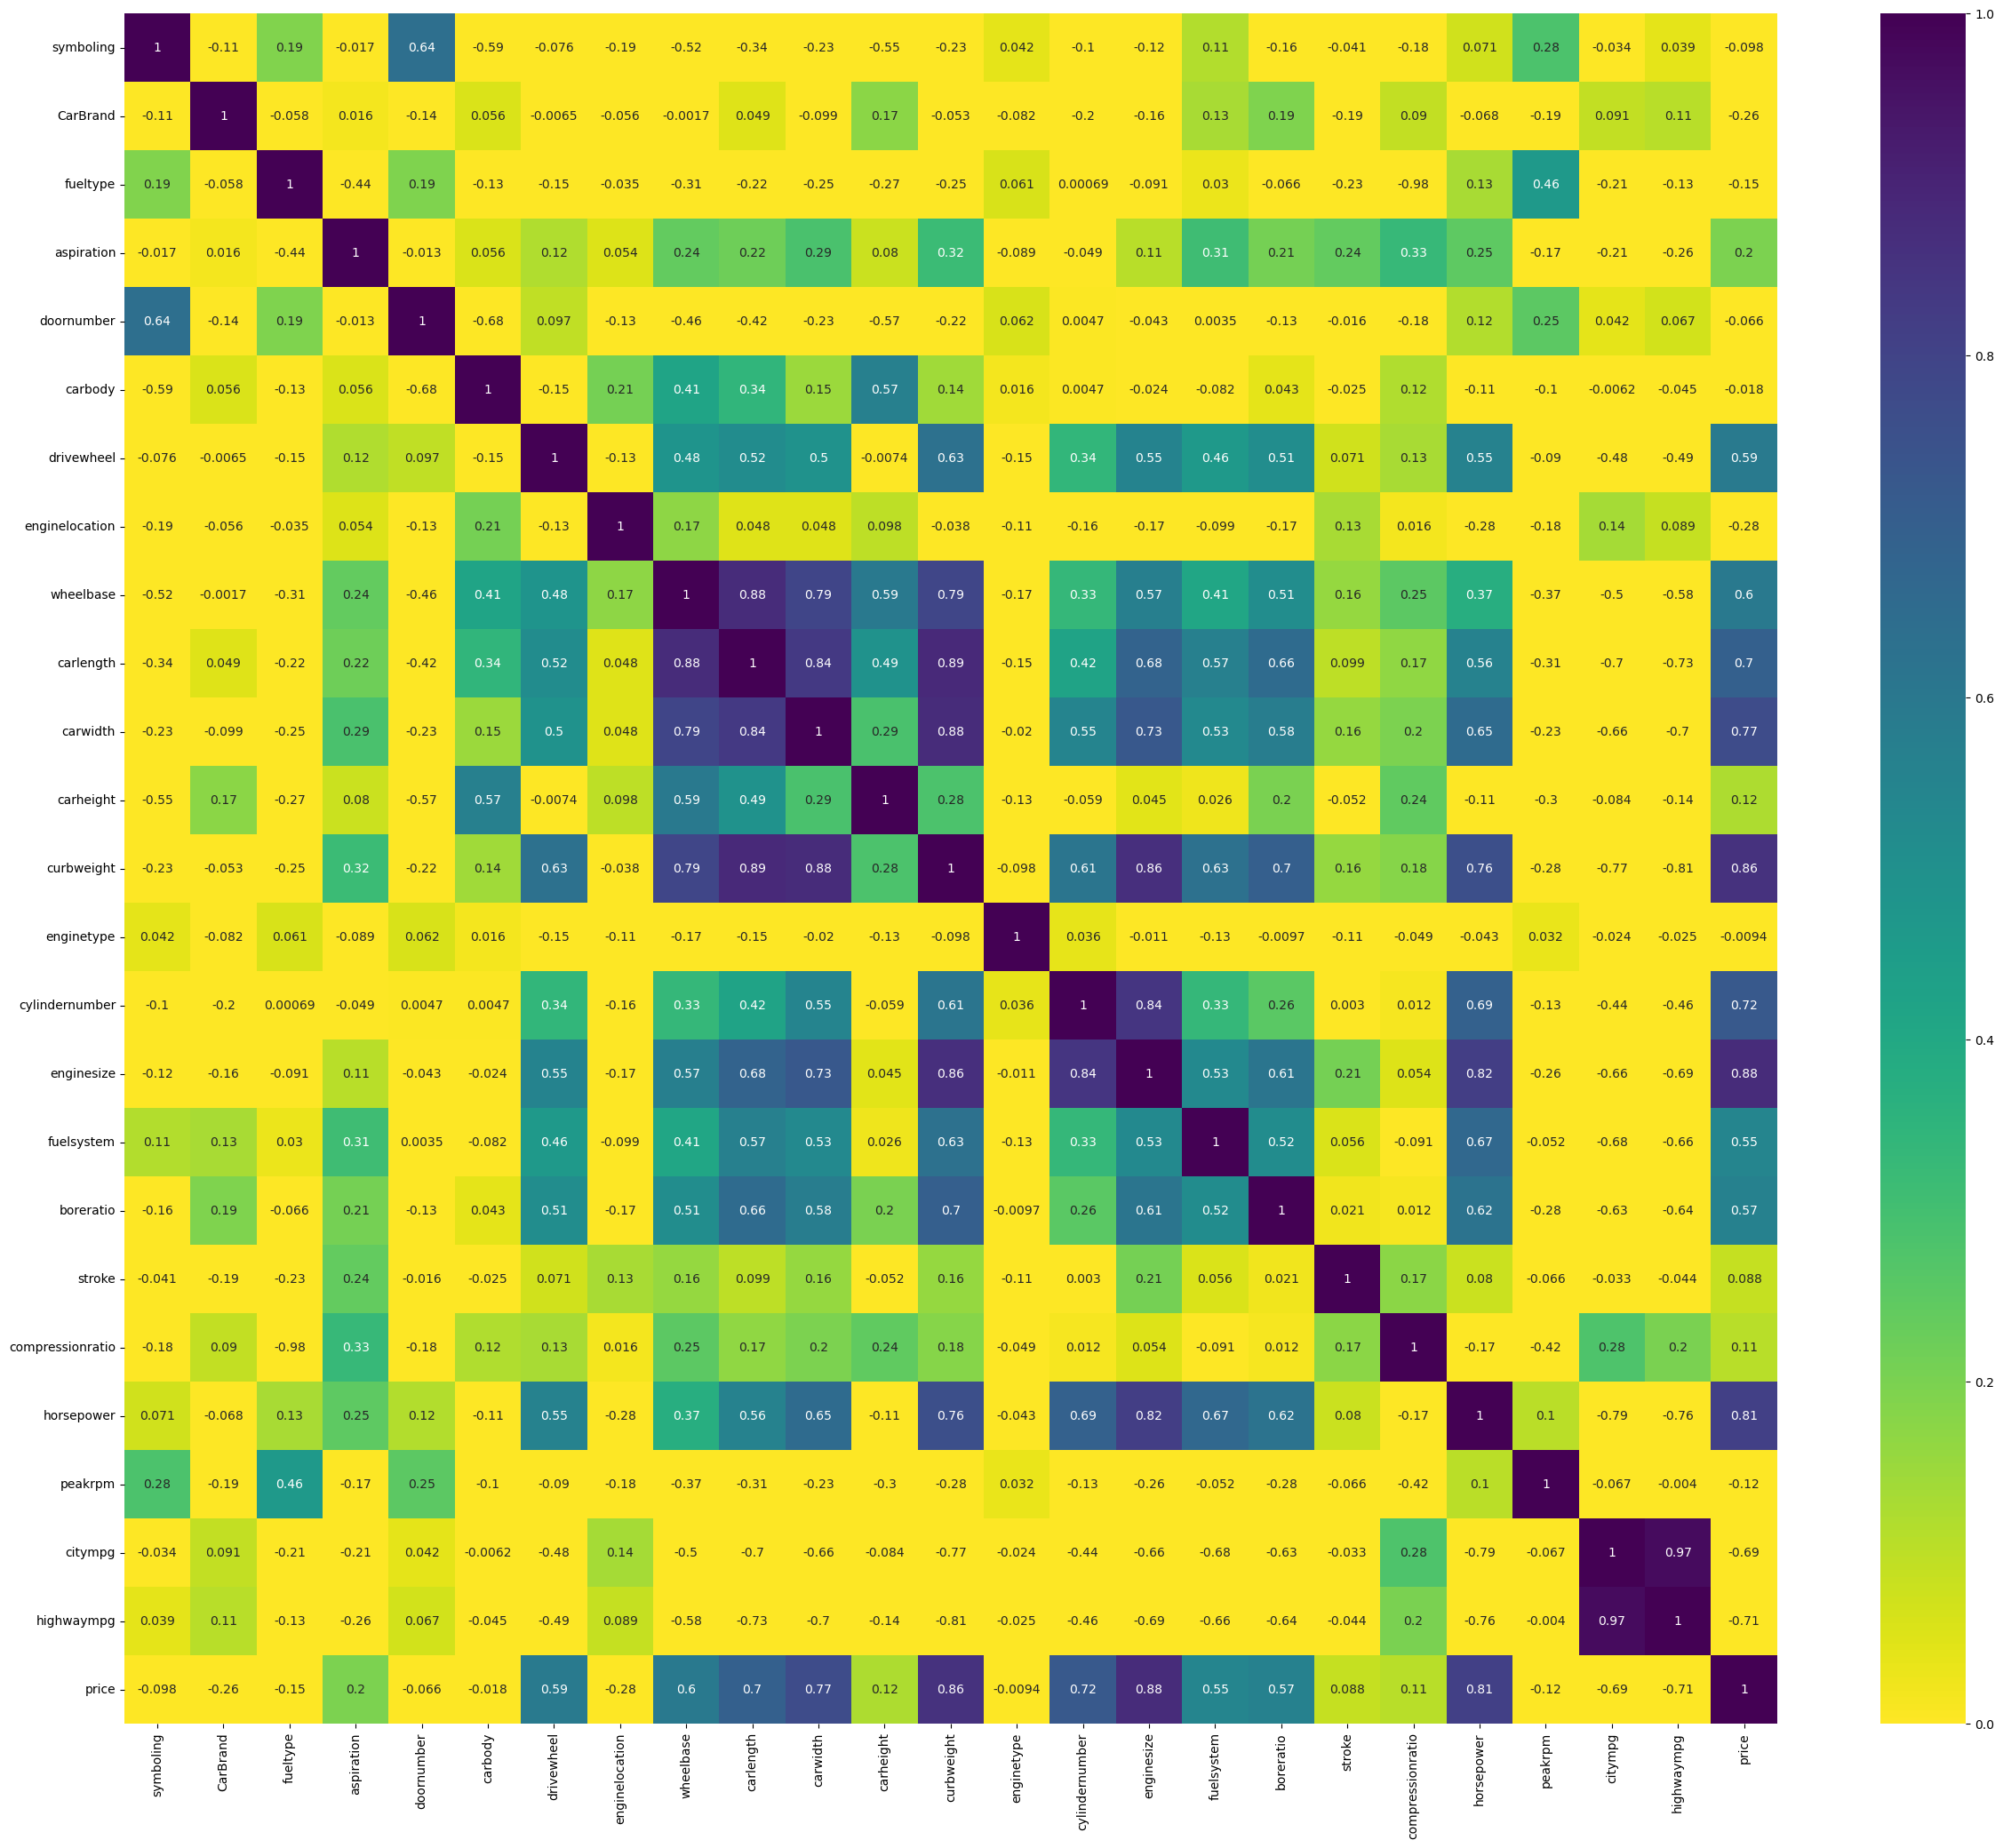

In [39]:
#plotting heatmap on the correlation
plt.figure(figsize = [30,25])
sns.heatmap(df_train.corr() , cmap = 'viridis_r' , vmin = 0 , annot = True)
plt.show()

From the heatmap we can understand that many variables have higher correlation between them, this will be an issue of multicollinearity and will be addressed during the VIF calculation

In [40]:
#Splitting the dependent and independent variables
y_train = df_train.pop('price')
X_train = df_train

In [41]:
df_train.head()

,symboling,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,-0.653324,0.182756,0.317287,-0.482786,-0.873751,1.552697,1.191318,0.111111,2.443162,1.882750,...,-0.361331,-0.186511,0.895216,0.509967,-0.248415,-0.431875,-0.204704,-0.245127,-0.930146,-0.946702
1,-0.653324,-0.454947,0.317287,-0.482786,-0.873751,0.410803,-0.634627,0.111111,-0.023932,0.253820,...,-0.361331,-0.138978,-1.082096,0.248375,0.397996,-0.379665,-0.527029,-0.668293,0.113654,0.190727
2,1.745449,0.501608,0.317287,-0.482786,1.144491,-1.872985,1.191318,-9.000000,-1.513801,-0.433264,...,1.434373,1.572231,0.895216,1.556334,-1.185709,-0.144722,2.522663,1.659121,-1.228375,-0.804523
3,0.146267,-1.092649,0.317287,2.071309,1.144491,0.410803,-0.634627,0.111111,-0.840957,-1.328790,...,-0.361331,-0.709381,0.895216,-1.096953,0.397996,-0.640713,-0.080732,0.812789,-0.184575,-0.093630
4,-0.653324,-0.933224,0.317287,-0.482786,-0.873751,0.410803,-0.634627,0.111111,-0.392395,0.068539,...,-0.361331,-0.424179,-1.576424,-0.648510,1.012085,-0.275246,-0.477440,1.447538,0.262769,0.332906


### Model creation 

In [42]:
# Model 1 - creating a model with all the variables to view the R2 score

# Adding constant to the dataset
X_train_sm = sm.add_constant(X_train)

# Initializing the model
lr_model = sm.OLS(y_train, X_train_sm)

#fitting the model
lr_model_sm = lr_model.fit()

#viewing the summary
lr_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     57.25
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           3.46e-60
Time:                        16:00:58   Log-Likelihood:                -36.941
No. Observations:                 164   AIC:                             123.9
Df Residuals:                     139   BIC:                             201.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -1.11e-16      0.026  -4.32e-15      1.000      -0.051       0.051
symboling           -0.0200      0.045     -0.448      0.655      -0.108       0.068
CarBrand            -0.2142      0.033     -6.463      0.000      -0.280      -0.149
fueltype            -0.0152      0.274     -0.056      0.956      -0.557       0.526
aspiration          -0.0141      0.051     -0.277      0.782      -0.114       0.086
doornumber          -0.0466      0.044     -1.053      0.294      -0.134       0.041
carbody             -0.0997      0.044     -2.248      0.026      -0.187      -0.012
drivewheel           0.0300      0.043      0.703      0.483      -0.054       0.114
enginelocation      -0.1452      0.033     -4.412      0.000      -0.210      -0.080
wheelbase            0.0444      0.086      0.518      0.605      -0.125       0.214
carlength            0.0520      0.095      0.546      0.586      -0.137       0.241
carwidth             0.0848      0.074      1.142      0.255      -0.062       0.231
carheight            0.0743      0.044      1.697      0.092      -0.012       0.161
curbweight           0.2864      0.145      1.973      0.050      -0.001       0.573
enginetype           0.0367      0.031      1.200      0.232      -0.024       0.097
cylindernumber      -0.0752      0.096     -0.785      0.434      -0.265       0.114
enginesize           0.3509      0.155      2.269      0.025       0.045       0.657
fuelsystem           0.0185      0.042      0.439      0.662      -0.065       0.102
boreratio           -0.1011      0.057     -1.787      0.076      -0.213       0.011
stroke              -0.1061      0.037     -2.883      0.005      -0.179      -0.033
compressionratio     0.0525      0.256      0.205      0.838      -0.454       0.559
horsepower           0.3437      0.104      3.297      0.001       0.138       0.550
peakrpm              0.0215      0.043      0.500      0.618      -0.063       0.106
citympg              0.0587      0.153      0.384      0.701      -0.243       0.361
highwaympg           0.0470      0.142      0.331      0.741      -0.233       0.327
==============================================================================
Omnibus:                       37.431   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.824
Skew:                           0.638   Prob(JB):                     5.50e-45
Kurtosis:                       8.310   Cond. No.                         42.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the summary we could notice
 - The Adjusted R2 score is 89% which is a good score, that means 88% of the data is explained by the model.
 - The probability of F_statistic value is too low that suggests the model score is not by chance.
 - The p-value is >0.05 for many variables
 
Since the manual removal of variables will be hard, we can use the RFE feature to removal low performing features.

#### Model Creation Using RFE

There are a total of 24 columns, using RFE we will build a model with 20 features initially and proceed with feature elimination further based on the p values and VIF values

In [43]:
#RFE 1
# Initialize the model for RFE
lm = LinearRegression()

# Initialize RFE with the model
rfe1 = RFE(estimator=lm, n_features_to_select=20)

# Fit RFE
rfe1.fit(X_train, y_train)

# print the selected features
print(rfe1.support_ , '\n' , rfe1.ranking_)

[False  True False False  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True] 
 [2 1 3 5 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1]


#### Building Model using the features suggested by RFE

In [44]:
# Collecting the columns suggested by RFE
sugg_col = X_train.columns[rfe1.support_]

# Subsetting the training data for 20 selected columns
X_train_rfe1 = X_train[sugg_col]

#verifying
X_train_rfe1.head()

,CarBrand,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0.182756,-0.873751,1.552697,1.191318,0.111111,2.443162,1.882750,1.099752,1.950053,1.216140,-0.883192,-0.361331,-0.186511,0.509967,-0.248415,-0.431875,-0.204704,-0.245127,-0.930146,-0.946702
1,-0.454947,-0.873751,0.410803,-0.634627,0.111111,-0.023932,0.253820,0.242617,0.674008,-0.296359,0.057350,-0.361331,-0.138978,0.248375,0.397996,-0.379665,-0.527029,-0.668293,0.113654,0.190727
2,0.501608,1.144491,-1.872985,1.191318,-9.000000,-1.513801,-0.433264,-0.434069,-0.881171,0.341842,0.997893,1.434373,1.572231,1.556334,-1.185709,-0.144722,2.522663,1.659121,-1.228375,-0.804523
3,-1.092649,1.144491,0.410803,-0.634627,0.111111,-0.840957,-1.328790,-0.975418,-1.279935,-0.700307,0.057350,-0.361331,-0.709381,-1.096953,0.397996,-0.640713,-0.080732,0.812789,-0.184575,-0.093630
4,-0.933224,-0.873751,0.410803,-0.634627,0.111111,-0.392395,0.068539,-1.561880,0.115739,-0.366450,0.057350,-0.361331,-0.424179,-0.648510,1.012085,-0.275246,-0.477440,1.447538,0.262769,0.332906


In [45]:
# Model 2 - creating a model with all the suggested variables by RFE
# Adding constant to the dataset
X_train_rfe1_sm = sm.add_constant(X_train_rfe1)

# Initializing the model
lr_model = sm.OLS(y_train, X_train_rfe1_sm)

#fitting the model
lr_model_sm = lr_model.fit()

#viewing the summary
lr_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     70.45
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           9.47e-64
Time:                        16:00:58   Log-Likelihood:                -37.181
No. Observations:                 164   AIC:                             116.4
Df Residuals:                     143   BIC:                             181.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -1.11e-16      0.025  -4.37e-15      1.000      -0.050       0.050
CarBrand            -0.2103      0.031     -6.846      0.000      -0.271      -0.150
doornumber          -0.0551      0.040     -1.385      0.168      -0.134       0.024
carbody             -0.1002      0.043     -2.327      0.021      -0.185      -0.015
drivewheel           0.0356      0.040      0.886      0.377      -0.044       0.115
enginelocation      -0.1436      0.032     -4.463      0.000      -0.207      -0.080
wheelbase            0.0562      0.079      0.707      0.480      -0.101       0.213
carlength            0.0532      0.090      0.593      0.554      -0.124       0.231
carwidth             0.0802      0.072      1.107      0.270      -0.063       0.223
carheight            0.0766      0.042      1.803      0.074      -0.007       0.161
curbweight           0.2814      0.139      2.025      0.045       0.007       0.556
enginetype           0.0375      0.030      1.252      0.213      -0.022       0.097
cylindernumber      -0.0657      0.089     -0.735      0.463      -0.242       0.111
enginesize           0.3536      0.143      2.466      0.015       0.070       0.637
boreratio           -0.0962      0.054     -1.785      0.076      -0.203       0.010
stroke              -0.1058      0.035     -3.027      0.003      -0.175      -0.037
compressionratio     0.0604      0.041      1.467      0.145      -0.021       0.142
horsepower           0.3387      0.084      4.036      0.000       0.173       0.505
peakrpm              0.0236      0.039      0.612      0.541      -0.053       0.100
citympg              0.0544      0.142      0.382      0.703      -0.227       0.336
highwaympg           0.0513      0.134      0.383      0.703      -0.214       0.316
==============================================================================
Omnibus:                       40.040   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.226
Skew:                           0.689   Prob(JB):                     2.76e-50
Kurtosis:                       8.613   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

When comparing Model 1 and Model 2, we could notice that the Adjusted R2 has improved after removing the 4 insignificant variables. But still 13 variables has p values more than 0.05. also lets view VIF for the sanity check

In [46]:
#VIF Calculation
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values , i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,Features,VIF
12,enginesize,31.90
18,citympg,31.47
9,curbweight,29.97
19,highwaympg,27.86
6,carlength,12.50
11,cylindernumber,12.37
16,horsepower,10.93
5,wheelbase,9.79
7,carwidth,8.14
13,boreratio,4.51


From the Above VIF table, there are 9 variables with VIF score more than 5. Inorder to remove the insignificant variables using the p-values and to remove the variables with high multicollinearity, let us create another RFE model to suggest the better variables with 15 most significant variables.

In [47]:
# RFE2
#lm is LinearRegression()
rfe2 = RFE(estimator = lm, n_features_to_select = 15)

#fitting RFE
rfe2.fit(X_train, y_train)

#printing the selected features
print(rfe2.support_ , '\n' , rfe2.ranking_)

# Collecting the columns suggested by RFE
sugg_col = X_train.columns[rfe2.support_]

# Subsetting the training data for 15 selected columns
X_train_rfe2 = X_train[sugg_col]

#verifying
X_train_rfe2.head()

[False  True False False  True  True False  True  True False  True  True
  True False  True  True False  True  True  True  True False False  True] 
 [ 7  1  8 10  1  1  2  1  1  4  1  1  1  5  1  1  9  1  1  1  1  6  3  1]


,CarBrand,doornumber,carbody,enginelocation,wheelbase,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,highwaympg
0,0.182756,-0.873751,1.552697,0.111111,2.443162,1.099752,1.950053,1.216140,-0.361331,-0.186511,0.509967,-0.248415,-0.431875,-0.204704,-0.946702
1,-0.454947,-0.873751,0.410803,0.111111,-0.023932,0.242617,0.674008,-0.296359,-0.361331,-0.138978,0.248375,0.397996,-0.379665,-0.527029,0.190727
2,0.501608,1.144491,-1.872985,-9.000000,-1.513801,-0.434069,-0.881171,0.341842,1.434373,1.572231,1.556334,-1.185709,-0.144722,2.522663,-0.804523
3,-1.092649,1.144491,0.410803,0.111111,-0.840957,-0.975418,-1.279935,-0.700307,-0.361331,-0.709381,-1.096953,0.397996,-0.640713,-0.080732,-0.093630
4,-0.933224,-0.873751,0.410803,0.111111,-0.392395,-1.561880,0.115739,-0.366450,-0.361331,-0.424179,-0.648510,1.012085,-0.275246,-0.477440,0.332906


In [48]:
#Model 3 - Creating a model with RFE suggested columns - 15

# Adding constant to the dataset
X_train_rfe2_sm = sm.add_constant(X_train_rfe2)

# Initializing the model
lr_model = sm.OLS(y_train, X_train_rfe2_sm)

#fitting the model
lr_model_sm = lr_model.fit()

#viewing the summary
lr_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     94.95
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           6.28e-68
Time:                        16:00:59   Log-Likelihood:                -38.935
No. Observations:                 164   AIC:                             109.9
Df Residuals:                     148   BIC:                             159.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -1.11e-16      0.025   -4.4e-15      1.000      -0.050       0.050
CarBrand            -0.2123      0.029     -7.247      0.000      -0.270      -0.154
doornumber          -0.0478      0.038     -1.250      0.213      -0.123       0.028
carbody             -0.0868      0.039     -2.208      0.029      -0.164      -0.009
enginelocation      -0.1526      0.031     -4.926      0.000      -0.214      -0.091
wheelbase            0.0766      0.068      1.129      0.261      -0.058       0.211
carwidth             0.0976      0.062      1.562      0.120      -0.026       0.221
carheight            0.0653      0.040      1.621      0.107      -0.014       0.145
curbweight           0.2852      0.129      2.217      0.028       0.031       0.539
cylindernumber      -0.0814      0.086     -0.945      0.346      -0.252       0.089
enginesize           0.3713      0.132      2.815      0.006       0.111       0.632
boreratio           -0.0970      0.052     -1.880      0.062      -0.199       0.005
stroke              -0.1150      0.034     -3.412      0.001      -0.182      -0.048
compressionratio     0.0665      0.038      1.736      0.085      -0.009       0.142
horsepower           0.3382      0.069      4.883      0.000       0.201       0.475
highwaympg           0.0757      0.061      1.251      0.213      -0.044       0.195
==============================================================================
Omnibus:                       45.142   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.330
Skew:                           0.846   Prob(JB):                     6.50e-53
Kurtosis:                       8.684   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#VIF Calculation
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values , i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif.head(50)

,Features,VIF
9,enginesize,27.35
7,curbweight,26.03
8,cylindernumber,11.67
13,horsepower,7.54
4,wheelbase,7.25
5,carwidth,6.13
14,highwaympg,5.76
10,boreratio,4.19
6,carheight,2.55
2,carbody,2.43


From the above summary and VIF values, wheelbase has both higher p-value and VIF hence dropping citympg and creating a model.

In [50]:
#Model 4 - Creating a model after dropping wheelbase - 14

#dropping wheelbase
X_train_rfe2.drop('wheelbase' , inplace = True , axis = 1)

# Adding constant to the dataset
X_train_sm = sm.add_constant(X_train_rfe2)

# Initializing the model
lr_model = sm.OLS(y_train, X_train_sm)

#fitting the model
lr_model_sm = lr_model.fit()

#viewing the summary
lr_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     101.5
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           1.15e-68
Time:                        16:00:59   Log-Likelihood:                -39.638
No. Observations:                 164   AIC:                             109.3
Df Residuals:                     149   BIC:                             155.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -1.11e-16      0.025   -4.4e-15      1.000      -0.050       0.050
CarBrand            -0.2102      0.029     -7.183      0.000      -0.268      -0.152
doornumber          -0.0481      0.038     -1.258      0.210      -0.124       0.027
carbody             -0.0770      0.038     -2.007      0.047      -0.153      -0.001
enginelocation      -0.1489      0.031     -4.828      0.000      -0.210      -0.088
carwidth             0.1281      0.056      2.274      0.024       0.017       0.239
carheight            0.0826      0.037      2.214      0.028       0.009       0.156
curbweight           0.3245      0.124      2.618      0.010       0.080       0.569
cylindernumber      -0.0992      0.085     -1.170      0.244      -0.267       0.068
enginesize           0.3969      0.130      3.052      0.003       0.140       0.654
boreratio           -0.1038      0.051     -2.023      0.045      -0.205      -0.002
stroke              -0.1154      0.034     -3.421      0.001      -0.182      -0.049
compressionratio     0.0623      0.038      1.631      0.105      -0.013       0.138
horsepower           0.3169      0.067      4.751      0.000       0.185       0.449
highwaympg           0.0768      0.061      1.268      0.207      -0.043       0.196
==============================================================================
Omnibus:                       43.428   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.836
Skew:                           0.807   Prob(JB):                     2.04e-50
Kurtosis:                       8.557   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#VIF Calculation
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values , i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif.head(50)

,Features,VIF
8,enginesize,26.54
6,curbweight,24.12
7,cylindernumber,11.28
12,horsepower,6.98
13,highwaympg,5.76
4,carwidth,4.98
9,boreratio,4.13
2,carbody,2.31
1,doornumber,2.30
11,compressionratio,2.29


From the above summary and VIF values, wheelbase has both higher p-value and VIF hence dropping cylindernumber and creating a model.

In [52]:
#Model 5 - Creating a model after dropping cylindernumber - 13

#dropping cylindernumber
X_train_rfe2.drop('cylindernumber' , inplace = True , axis = 1)

# Adding constant to the dataset
X_train_sm = sm.add_constant(X_train_rfe2)

# Initializing the model
lr_model = sm.OLS(y_train, X_train_sm)

#fitting the model
lr_model_sm = lr_model.fit()

#viewing the summary
lr_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     108.9
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           2.11e-69
Time:                        16:00:59   Log-Likelihood:                -40.388
No. Observations:                 164   AIC:                             108.8
Df Residuals:                     150   BIC:                             152.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -1.11e-16      0.025  -4.39e-15      1.000      -0.050       0.050
CarBrand            -0.2122      0.029     -7.258      0.000      -0.270      -0.154
doornumber          -0.0455      0.038     -1.190      0.236      -0.121       0.030
carbody             -0.0868      0.038     -2.314      0.022      -0.161      -0.013
enginelocation      -0.1548      0.030     -5.085      0.000      -0.215      -0.095
carwidth             0.1134      0.055      2.063      0.041       0.005       0.222
carheight            0.0824      0.037      2.206      0.029       0.009       0.156
curbweight           0.3846      0.113      3.405      0.001       0.161       0.608
enginesize           0.2664      0.067      3.982      0.000       0.134       0.399
boreratio           -0.0653      0.039     -1.656      0.100      -0.143       0.013
stroke              -0.0921      0.027     -3.376      0.001      -0.146      -0.038
compressionratio     0.0526      0.037      1.410      0.161      -0.021       0.126
horsepower           0.2887      0.062      4.636      0.000       0.166       0.412
highwaympg           0.0777      0.061      1.281      0.202      -0.042       0.198
==============================================================================
Omnibus:                       46.716   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.797
Skew:                           0.866   Prob(JB):                     1.42e-57
Kurtosis:                       8.942   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#VIF Calculation
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values , i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif.head(50)

,Features,VIF
6,curbweight,19.97
7,enginesize,7.01
11,horsepower,6.07
12,highwaympg,5.76
4,carwidth,4.73
8,boreratio,2.43
1,doornumber,2.29
2,carbody,2.20
5,carheight,2.18
10,compressionratio,2.18


Dropping highwaympg since it has higher p-value also higher VIF

In [54]:
#Model 6 - Creating a model after dropping highwaympg - 12

# Dropping highwaympg
X_train_rfe2.drop('highwaympg' , axis = 1 , inplace = True)

#Adding constant to the dataset
X_train_sm = sm.add_constant(X_train_rfe2)

# Initializing the the model
lr_model = sm.OLS(y_train, X_train_sm)

#fitting the model
lr_model_sm = lr_model.fit()

#viewing summary
lr_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     117.3
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           4.28e-70
Time:                        16:00:59   Log-Likelihood:                -41.280
No. Observations:                 164   AIC:                             108.6
Df Residuals:                     151   BIC:                             148.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -1.11e-16      0.025  -4.38e-15      1.000      -0.050       0.050
CarBrand            -0.2064      0.029     -7.130      0.000      -0.264      -0.149
doornumber          -0.0495      0.038     -1.295      0.197      -0.125       0.026
carbody             -0.0859      0.038     -2.287      0.024      -0.160      -0.012
enginelocation      -0.1504      0.030     -4.961      0.000      -0.210      -0.090
carwidth             0.1166      0.055      2.118      0.036       0.008       0.225
carheight            0.0832      0.037      2.223      0.028       0.009       0.157
curbweight           0.2962      0.090      3.306      0.001       0.119       0.473
enginesize           0.2982      0.062      4.789      0.000       0.175       0.421
boreratio           -0.0682      0.039     -1.729      0.086      -0.146       0.010
stroke              -0.0919      0.027     -3.359      0.001      -0.146      -0.038
compressionratio     0.0787      0.031      2.511      0.013       0.017       0.141
horsepower           0.2775      0.062      4.491      0.000       0.155       0.400
==============================================================================
Omnibus:                       47.731   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.042
Skew:                           0.875   Prob(JB):                     2.55e-61
Kurtosis:                       9.146   Cond. No.                         8.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#VIF Calculation
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values , i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,Features,VIF
6,curbweight,12.52
7,enginesize,6.04
11,horsepower,5.95
4,carwidth,4.72
8,boreratio,2.43
1,doornumber,2.27
2,carbody,2.20
5,carheight,2.18
10,compressionratio,1.53
3,enginelocation,1.43


From the above summary, both the below variables have multicollinearity, but
- enginesize has p-value of 0.00, which is highly significant
- curbweight has p-value of 0.014, which makes it lesser significant

Hence dropping curbweight and creating the model

In [56]:
#Model 7 - Creating a model after dropping curbweight - 11

# Dropping curbweight
X_train_rfe2.drop('curbweight' , axis = 1 , inplace = True)

#Adding constant to the dataset
X_train_sm = sm.add_constant(X_train_rfe2)

# Initializing the the model
lr_model = sm.OLS(y_train, X_train_sm)

#fitting the model
lr_model_sm = lr_model.fit()

#viewing summary
lr_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     119.2
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           7.19e-69
Time:                        16:01:28   Log-Likelihood:                -47.009
No. Observations:                 164   AIC:                             118.0
Df Residuals:                     152   BIC:                             155.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -1.11e-16      0.026  -4.25e-15      1.000      -0.052       0.052
CarBrand            -0.2100      0.030     -7.035      0.000      -0.269      -0.151
doornumber          -0.0637      0.039     -1.627      0.106      -0.141       0.014
carbody             -0.0871      0.039     -2.246      0.026      -0.164      -0.010
enginelocation      -0.1257      0.030     -4.145      0.000      -0.186      -0.066
carwidth             0.2084      0.049      4.250      0.000       0.111       0.305
carheight            0.1179      0.037      3.181      0.002       0.045       0.191
enginesize           0.4061      0.055      7.421      0.000       0.298       0.514
boreratio           -0.0260      0.039     -0.674      0.502      -0.102       0.050
stroke              -0.0968      0.028     -3.433      0.001      -0.152      -0.041
compressionratio     0.1095      0.031      3.544      0.001       0.048       0.171
horsepower           0.3461      0.060      5.763      0.000       0.227       0.465
==============================================================================
Omnibus:                       46.779   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.587
Skew:                           0.944   Prob(JB):                     2.53e-47
Kurtosis:                       8.276   Cond. No.                         5.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
#VIF Calculation
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values , i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,Features,VIF
10,horsepower,5.28
6,enginesize,4.38
4,carwidth,3.52
1,doornumber,2.24
2,carbody,2.20
7,boreratio,2.17
5,carheight,2.01
9,compressionratio,1.40
3,enginelocation,1.35
0,CarBrand,1.30


The variable boreratio has higher p-value, hence dropping the variable.

In [58]:
#Model 8 - Creating a model after dropping boreratio - 10

# Dropping boreratio
X_train_rfe2.drop('boreratio' , axis = 1 , inplace = True)

#Adding constant to the dataset
X_train_sm = sm.add_constant(X_train_rfe2)

# Initializing the the model
lr_model = sm.OLS(y_train, X_train_sm)

#fitting the model
lr_model_sm = lr_model.fit()

#viewing summary
lr_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     131.6
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           7.64e-70
Time:                        16:03:34   Log-Likelihood:                -47.254
No. Observations:                 164   AIC:                             116.5
Df Residuals:                     153   BIC:                             150.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -1.11e-16      0.026  -4.25e-15      1.000      -0.052       0.052
CarBrand            -0.2163      0.028     -7.637      0.000      -0.272      -0.160
doornumber          -0.0626      0.039     -1.603      0.111      -0.140       0.015
carbody             -0.0855      0.039     -2.213      0.028      -0.162      -0.009
enginelocation      -0.1245      0.030     -4.120      0.000      -0.184      -0.065
carwidth             0.2032      0.048      4.203      0.000       0.108       0.299
carheight            0.1140      0.037      3.120      0.002       0.042       0.186
enginesize           0.3999      0.054      7.426      0.000       0.294       0.506
stroke              -0.0963      0.028     -3.422      0.001      -0.152      -0.041
compressionratio     0.1106      0.031      3.593      0.000       0.050       0.171
horsepower           0.3382      0.059      5.752      0.000       0.222       0.454
==============================================================================
Omnibus:                       45.769   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.501
Skew:                           0.934   Prob(JB):                     1.76e-44
Kurtosis:                       8.099   Cond. No.                         4.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
#VIF Calculation
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values , i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,Features,VIF
9,horsepower,5.07
6,enginesize,4.26
4,carwidth,3.43
1,doornumber,2.24
2,carbody,2.19
5,carheight,1.96
8,compressionratio,1.39
3,enginelocation,1.34
0,CarBrand,1.18
7,stroke,1.16


Dropping doornumber since it has a higher p-value.

In [60]:
#Model 9 - Creating a model after dropping doornumber - 9

# Dropping doornumber
X_train_rfe2.drop('doornumber' , axis = 1 , inplace = True)

#Adding constant to the dataset
X_train_sm = sm.add_constant(X_train_rfe2)


# Initializing the the model
lr_model = sm.OLS(y_train, X_train_sm)

#fitting the model
lr_model_sm = lr_model.fit()

#viewing summary
lr_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     144.4
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           2.19e-70
Time:                        16:05:16   Log-Likelihood:                -48.620
No. Observations:                 164   AIC:                             117.2
Df Residuals:                     154   BIC:                             148.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -1.11e-16      0.026  -4.23e-15      1.000      -0.052       0.052
CarBrand            -0.2090      0.028     -7.440      0.000      -0.265      -0.154
carbody             -0.0517      0.033     -1.589      0.114      -0.116       0.013
enginelocation      -0.1293      0.030     -4.280      0.000      -0.189      -0.070
carwidth             0.2174      0.048      4.555      0.000       0.123       0.312
carheight            0.1238      0.036      3.417      0.001       0.052       0.195
enginesize           0.4103      0.054      7.637      0.000       0.304       0.516
stroke              -0.0941      0.028     -3.332      0.001      -0.150      -0.038
compressionratio     0.1074      0.031      3.479      0.001       0.046       0.168
horsepower           0.3163      0.057      5.504      0.000       0.203       0.430
==============================================================================
Omnibus:                       38.126   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.844
Skew:                           0.822   Prob(JB):                     3.18e-30
Kurtosis:                       7.144   Cond. No.                         4.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After dropping doornumber, p-value of carbody has increased, hence dropping carbody

In [61]:
#Model 10 - Creating a model after dropping carbody - 10

# Dropping carbody
X_train_rfe2.drop('carbody' , axis = 1 , inplace = True)

#Adding constant to the dataset
X_train_sm = sm.add_constant(X_train_rfe2)


# Initializing the the model
lr_model = sm.OLS(y_train, X_train_sm)

#fitting the model
lr_model_sm = lr_model.fit()

#viewing summary
lr_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     160.6
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           5.80e-71
Time:                        16:06:50   Log-Likelihood:                -49.953
No. Observations:                 164   AIC:                             117.9
Df Residuals:                     155   BIC:                             145.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -1.11e-16      0.026  -4.21e-15      1.000      -0.052       0.052
CarBrand            -0.2069      0.028     -7.335      0.000      -0.263      -0.151
enginelocation      -0.1373      0.030     -4.586      0.000      -0.196      -0.078
carwidth             0.2181      0.048      4.546      0.000       0.123       0.313
carheight            0.0941      0.031      3.017      0.003       0.032       0.156
enginesize           0.4128      0.054      7.648      0.000       0.306       0.519
stroke              -0.0934      0.028     -3.292      0.001      -0.149      -0.037
compressionratio     0.1078      0.031      3.475      0.001       0.047       0.169
horsepower           0.3144      0.058      5.445      0.000       0.200       0.428
==============================================================================
Omnibus:                       36.030   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.970
Skew:                           0.782   Prob(JB):                     1.20e-27
Kurtosis:                       6.962   Cond. No.                         4.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
#VIF Calculation
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values , i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,Features,VIF
7,horsepower,4.80
4,enginesize,4.19
2,carwidth,3.31
3,carheight,1.40
6,compressionratio,1.39
1,enginelocation,1.29
5,stroke,1.16
0,CarBrand,1.15


Now we can see from the summary and VIF that,
- The p-values of all the variables are under threshold(0.05).
- The VIF scores are under threshold(5).
- The R2 score and Adjusted R2 are around 88 - 89, which is a good score.
- The Probability of F-statistic is 5.80e-71, meaning that the R2 score is not achieved by chance.

Based on the above findings, we can finalize the model to predict further.

# 4. Residual Analysis

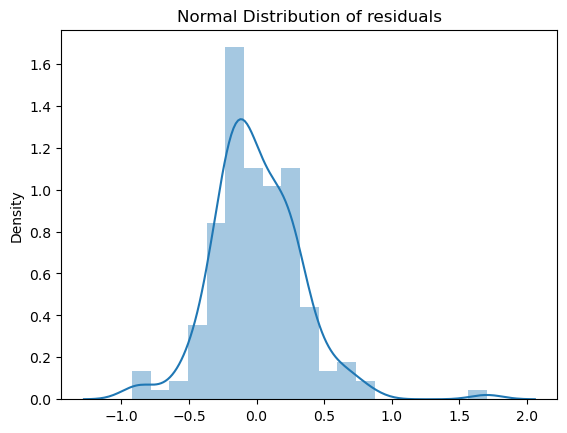

In [63]:
#Getting predicted y value using the model created
y_train_pred = lr_model_sm.predict(X_train_sm)

#Calculating residual
res = y_train - y_train_pred

#Residuals distribution
plt.title('Normal Distribution of residuals')
sns.distplot(res)
plt.show()

The plot shows that the residuals have a mean 0 and the error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

# 5. Prediction and Analysis

We have to perform the rescaling on the test data set before predicting the data.

In [64]:
#transforming the test data just like training data
df_test = scaler.transform(df_test)

# The output is stored as a numpy array
# Typecasting the data to dataframe 
df_test = pd.DataFrame(df_test)

# Due to typecasting the variable names has been lost,
# Renaming the columns
df_test.columns = column_names

#verify
df_test.columns

Index(['symboling', 'CarBrand', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [65]:
df_test.describe()

,symboling,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,0.068258,0.276079,-0.105762,-0.109016,0.061532,-0.146218,-0.189275,-0.111111,-0.154438,-0.178691,...,-0.111733,0.159752,0.116212,-0.184956,0.115052,-0.141206,0.098051,-0.013639,0.065888,-0.060392
std,0.976105,0.980161,1.149263,0.913955,1.018918,0.888990,1.063171,1.422916,0.791631,0.707309,...,0.940945,0.964396,1.055274,1.054142,1.171490,0.886772,1.042404,0.867918,0.886308,0.998729
min,-1.452915,-1.889778,-3.151719,-0.482786,-0.873751,-3.014879,-2.460573,-9.000000,-1.513801,-1.359670,...,-1.374851,-1.082096,-2.404912,-2.931017,-0.797342,-1.320444,-2.043583,-1.675718,-2.084131,-1.033385
25%,-0.653324,-0.454947,0.317287,-0.482786,-0.873751,-0.731091,-0.634627,0.111111,-0.712796,-0.633985,...,-0.709381,-1.082096,-0.573770,-0.765543,-0.353561,-0.874148,-0.668293,-0.930146,-0.520166,-0.675746
50%,0.146267,0.501608,0.317287,-0.482786,-0.873751,0.410803,-0.634627,0.111111,-0.424435,-0.193943,...,-0.447946,0.895216,0.024154,0.010149,-0.275246,-0.378263,0.178039,0.113654,0.048549,-0.422883
75%,0.945858,1.139310,0.317287,-0.482786,1.144491,0.410803,1.191318,0.111111,0.232389,0.176620,...,0.193757,0.895216,1.107891,0.430316,-0.170827,0.216798,0.812789,0.859226,0.901621,0.034024
max,1.745449,1.458162,0.317287,2.071309,1.144491,1.552697,1.191318,0.111111,2.090720,1.905910,...,4.186579,1.883872,2.303739,2.046342,3.379423,2.522663,3.140203,1.753913,2.181229,4.009113


In [66]:
#Splitting and dependent and independent variables
y_test = df_test.pop('price')
X_test = df_test

In [67]:
#viewing the final model variables
X_train_rfe2.columns

Index(['CarBrand', 'enginelocation', 'carwidth', 'carheight', 'enginesize',
       'stroke', 'compressionratio', 'horsepower'],
      dtype='object')

In [68]:
# Assigning the variables that are finalised in model
X_test = X_test[['CarBrand', 'enginelocation', 'carwidth', 'carheight', 'enginesize','stroke', 'compressionratio', 'horsepower']]

In [69]:
# Adding constant and viewing the X_test data 
X_test_sm = sm.add_constant(X_test)
X_test_sm['const'] = 1.0
X_test_sm.head()

,const,CarBrand,enginelocation,carwidth,carheight,enginesize,stroke,compressionratio,horsepower
0,1.0,-0.136095,0.111111,-0.253620,-0.881171,-0.424179,0.624239,-0.666818,0.266387
1,1.0,0.979885,0.111111,-0.253620,-0.522283,-0.471713,-2.026043,-0.275246,-0.279086
2,1.0,-1.092649,0.111111,-0.975418,-1.200182,-0.899515,-0.119133,-0.170827,-0.923737
3,1.0,-1.570926,0.111111,-0.524294,0.195492,-0.471713,-1.508915,-0.327456,-0.105527
4,1.0,1.139310,0.111111,-1.065643,2.109558,-0.851982,-0.765543,-0.275246,-1.072502


In [70]:
#Getting predicted y value using the model created
y_test_pred = lr_model_sm.predict(X_test_sm)

Text(0, 0.5, 'y_test_pred')

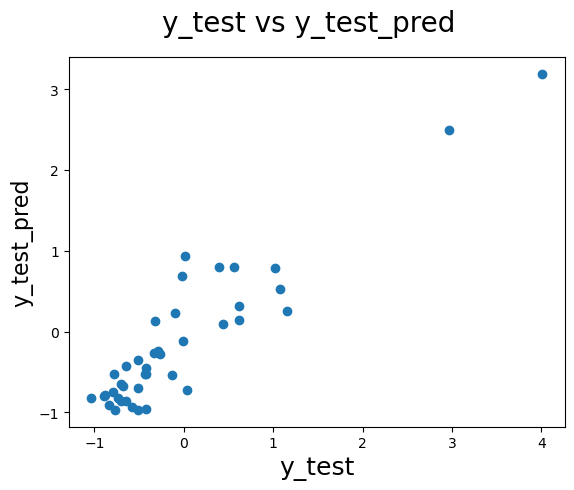

In [71]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)  

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [72]:
#Checking r2 score
r2_score(y_true = y_test , y_pred = y_test_pred)

0.8458029309590906

The final model has an R² score of 84% on the training data and 89% on the test data, indicating it is a good model. While there might be a slight hint of overfitting, it remains within an acceptable range.

# Solution:
    
1. Which variables are significant in predicting the price of a car?

The below variables are the significant ones:-

- CarBrand
- enginelocation
- carwidth
- carheight
- enginesize
- stroke
- compressionratio
- horsepower
    
2. How well do those variables describe the price of a car?

The variables describe the price of a car quite well, as evidenced by an R² score of 0.84 on the test data, indicating that 84% of the variance in car prices is explained by the model. Additionally, the F-statistic with a Prob (F-statistic) of 5.76e-71 confirms that the model is statistically significant and not formed by chance.